# Otimização por Múltiplos Enxames Aplicada ao Escalonamento Dinâmico de Projetos de Software


### Influência da mutação customizada

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon

from dspsp_analysis import (algorithm_dataset, instance_dataset, comparison_dataset, 
                            max_event, metrics_dataset, mean_hypervolume, median_hypervolume)

%matplotlib inline

data = metrics_dataset(filepath="../hypervolume/metrics-mutation-test.csv")
instance_ids = list(data.instance.unique())
algorithm_ids = list(data.algorithm.unique())

In [2]:
instance_datasets = {}
for inst in instance_ids:
    ds = instance_dataset(data, inst, zero_values=True)
    instance_datasets[inst] = {alg: algorithm_dataset(ds, alg, zero_values=True) for alg in algorithm_ids}

In [3]:
comparison_datasets = {}
for inst in instance_ids:
    comparison_datasets[inst] = {alg: comparison_dataset(instance_datasets[inst][alg]) for alg in algorithm_ids}


In [4]:
for inst in instance_ids:
    min_event = min([max_event(ds) for ds in comparison_datasets[inst].values()])
    for k in comparison_datasets[inst].keys():
        comparison_datasets[inst][k] = comparison_datasets[inst][k][:min_event+1]
        

#### Gráficos comparativos

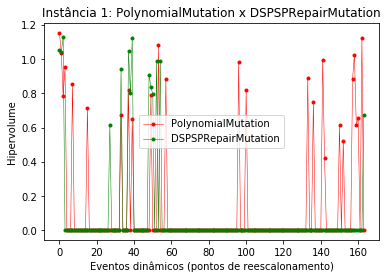

In [5]:
plt.title("Instância 1: PolynomialMutation x DSPSPRepairMutation")
plt.xlabel("Eventos dinâmicos (pontos de reescalonamento)")
plt.ylabel("Hipervolume")
plt.plot(comparison_datasets["ST10_DT10_E5_SK4-5"]["MS2MODynamic-polynomial"].event, comparison_datasets["ST10_DT10_E5_SK4-5"]["MS2MODynamic-polynomial"].hypervolume, "-ro", markersize=3, lw=.5, label="PolynomialMutation")
plt.plot(comparison_datasets["ST10_DT10_E5_SK4-5"]["MS2MODynamic-custom"].event, comparison_datasets["ST10_DT10_E5_SK4-5"]["MS2MODynamic-custom"].hypervolume, "-go", markersize=3, lw=.5, label="DSPSPRepairMutation")
plt.legend()
plt.show()

A exemplo dos testes realizados com o MS2MODyn, aplicar a mutação que mantém os ajustes proativos nos novos indivíduos aparenta ter piorado o desempenho.